### A continuación se muestra el código para SSA de un sólo sujeto para el cual se hizo el análisis por medio de SSA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

import codecs
import os

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy.signal import find_peaks_cwt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import math # math module
from datetime import datetime

In [3]:
import os
cwd = os.getcwd() # Busca el directorio actual
print(cwd) # Imprime directorio actual

for file in os.listdir(): #Enlista los archivos que se encuentren en el directorio con terminación .csv
    if file.endswith(".csv"):
        print(os.path.join(file))

for file in os.listdir(): #Enlista los archivos que se encuentren en este directorio con terminación .txt
    if file.endswith(".txt"):
        print(os.path.join(file))


C:\Users\Valentina\Desktop\algoritmos
2016-07-09_RF38m_Act.csv
2016-07-09_RF38m_Temp.csv
2016-08-07_IG35_Temp_Wrist.csv
2016-09-26_LM35m_Temp_Wrist.csv
2016-09-27_LM35m_Act.csv
2016-09-28_DC25_Act.csv
2016-09-28_DC25_TempWrist.csv
206-09-12_AntonioLopezRivera19_Temp_LWrist.csv
Antonio López Rivera (2016-09-02)60secDataTable.csv
Isreal Jose Garcia Flores (2016-08-07)60secDataTable.csv
Rafael Silva Quiroz (2016-08-17)60sec.csv
RS29m_Temp_Wrist.csv
2016-07-09_RF38m_Actremuestreado.txt
A.txt
Antonio López Rivera (2016-09-02)60secDataTable.txt
Barnsley.txt
Isreal Jose Garcia Flores (2016-08-07)60secDataTable.txt
Isreal Jose Garcia Flores (2016-08-07)60secDataTableremuestreado.txt
oscar (2016-08-14)60secDataTable.txt
Rafael Silva Quiroz (2016-08-17)60sec.txt
SD26f_Act.txt
SD26f_Actremuestreado.txt
SD26f_Temp.txt


In [4]:
def ScreeSSA(Serie,L): # 2 <= L <= N/2 Se define la función ScreeSSA que depende de Serie la cual 
    #será la serie de datos con la que se esté trabajando y de L que es un parámetro que debe de ser máximo 
    #del tamaño de la serie entre dos, normalmente este se ajusta al número de datos que se tienen por día.
    from scipy import linalg # Importa la paquetería linear algebra 
    N=len(Serie) #define un N como la longitud de la serie de tiempo
    K=N-L+1 #define K que será igual a la longitud de la serie menos la ventana (L) más uno que dará el úmero de ventanas 
    # posibles dentro de la serie de tiempo
    X=np.array([[Serie[i+j] for j in range(0,L)] for i in range(0,K)]) #forma una matriz de LxK recorriendo la serie cada L 
    #número de datos, al mismo tiempo que mueve la ventan uno al correr sobre K
    s=linalg.svd(X,compute_uv=False) # Se pide el SVD de la matriz X que se acaba de formar con los datos de la serie de tiempo
    #además está matriz que se acaba de construir es la que tiena la simetría Henkel 
    l=s**2 #Obtiene las varianzas parciales de la matriz Sigma obtenida por el metodo de SVD, esta matriz está compuesta por los
    #valores singulares de la matriz formada por el embedding de la serie de tiempo
    return l #regresa los valores de las varianzas parciales
#ScreeSSA(Datos1, 1440)

In [5]:
def SSA(Serie,L): # 2 <= L <= N/2 #Se define la función SSA que depende de la serie de tiempo y del parámetro L, que debe ser
    #de la longitud de la serie entre dos, normalmente se define como la cantidad de datos que se tendrían por día
### import packages ###
    import numpy as np 
    from scipy import linalg # linear algebra (matrix) processing package
    import math # math module
### initialize variables ###
    N=len(Serie) #define N como la longitud de la serie de tiempo
    K=N-L+1 #define K como el número de pasos que debe dar para recorrer la serie de tiempo en ventanas de tamaño L
### SVD ###
    X=np.array([[Serie[i+j] for j in range(0,L)] for i in range(0,K)]) #forma una matriz de LxK con filas de la serie de tiempo
    #de longitud L recorrida a pasos de 1, hasata llegas y columnas longitud K
    U, s, V=linalg.svd(X) # Obtiene el SVD de la matriz formada por la serie de tiempo y a cada salida le asiga una letra, se obtienen
    #tres matrices de esta descomposición, la matriz U con los los eigenvectores de la matriz X*X^(T) en sus columnas, la matriz 
    #s con los valores singulares de la matriz X y la atriz V con los eigenvectores de la matriz X^(T)*X en sus columnas
    l=s**2 # obtiene las varianzas parciales de la matriz x, elevando la cuadrado los valores de la matriz s 
    r=len(s)#define r como la longitud de la matriz s, número de varianzas parciales 
### time-series components ###
    gkList=np.zeros(shape=(r,N)) # Define una matriz de ceros donde van a ir los valores obtenidos con SSA
    for k in range(0,r): 
        Uk=U[:,k] # define Uk como la columna k-ésima de U con k en un rango de o hasta la última varianza parcial
        Vk=V[k,:] # define Vk como la fila k-ésima de V con k en un rango de o hasta la última varianza parcial
        Xk=s[k]*np.outer(Uk,Vk) # elemento k-ésimo de la matriz s 
        gk=[] #define una lista vacía donde se irán anexando los elementos k-ésimos, encada vuelta del for 
        #para cada i en el rango (min(K-1, L-1), -max(K-1, L-1)-1, -1)
        for i in range(min(K-1,L-1),-max(K-1,L-1)-1,-1): # hace un loop sobre los elementos gki que son los promedios de las
            #antidiagonales de la matriz X en el elemento k
            gki=np.mean(np.diag(np.fliplr(Xk),i))#hace la operación del promedio de los antidiagonales
            gk.append(gki) #apenda el valor gki a la lista vacía gk 
        gkList[k]=gk #define el elemento k de la matriz de ceros como gk 
        #print(gkList)
        ### w-corr matrix ###
    w=[] # w es una lista donde se irán anexando los pesos que se asignen a las antidiagonales
    LL=min(L,K) #se define LL como el mímimo entre L y K recordando que L es el parámetro que nos dice el número de datos por día
    #y k que es el número de filas que tendrá la matriz 
    KK=max(L,K) #por otro lado kk es el máximo de estos mismo dos números
    for ll in range(1,LL+1): # se define un loop que corra sobre la primera parte de los pesos
        w.append(ll) #se apenda el valor de ll a la lista vacía w
    for ll in range(LL+1,KK+1): # se define un loop para la parte intermedia de los pesos(la que más contribuye)
        w.append(LL)#se apenda el valor de ll a la lista vacía w
    for ll in range(KK+1,N+1): # se define un loop para la tercera parte de los pesos
        w.append(N-ll) #se apenda el valor para estos pesos a la lista w
    kMin=kkMin=0 #se define kMin como cero
    kMax=kkMax=20 #se define kMax como 20 
    #wMatriz[k][kk]=sum(w*gkList[k]*gkList[kk])/(math.sqrt(sum(w*
    for k in range(kMin,kMax): #se hace un loop que corra en el rango entre el mínimo de k y el máximo
        for kk in range(kkMin,kkMax): #dentro del loop corre otro loop para estos mismos valores
            wMatriz=[[sum(w*gkList[k]*gkList[kk])/(math.sqrt(sum(w*gkList[k]*gkList[k]))*math.sqrt(sum(w*gkList[kk]*gkList[kk]))) for k in range(kMin,kMax)] for kk in range(kkMin,kkMax)]
            #se forma una matriz después de pesar las antidiagonales, en esta parte se reconstruye la matriz
            wMatriz=np.array(wMatriz)
            return (r, l, gkList, wMatriz); #la función regresa los valores de r que es la cantidad varianzas parciales, l 
        #que son las varianzas parciales, gKList que contiene los k-ésimmos elementos de las matrices, y la matriz reconstruida

In [7]:
actigrafía2=np.loadtxt("Antonio López Rivera (2016-09-02)60secDataTable.csv",delimiter=",",skiprows=532,usecols=11)
#se importan los datos del sujeto que se va a analizar para actigrafía
print(len(actigrafía2))
print(actigrafía2.shape)
#print(type(actigrafía))
valores1= [] #se define una lista vacía 
for i in actigrafía2: #se recorre la serie de tiempo de actigrafía en un loop
    valores1.append(i) #se apenda cada valor de la serie de tiempo a la lista vacía
#print (valores1)
print(len(valores1)) #se pide la longitud de la lista 
temperatura2=np.loadtxt("206-09-12_AntonioLopezRivera19_Temp_LWrist.csv",delimiter=",",skiprows=20,usecols=2) #se importan los datos de la serie de tiempo de tempratura 
print(len(temperatura2)) #estos datos al final no se utilizaron
print(temperatura2.shape)

13901
(13901,)
13901
4096
(4096,)


In [8]:
B= ['{:}'.format(i) for i in valores1] #se le da formato a los datos que se apendaron en la lista vacía, se vuelven cadenas
B
f= open("Antonio López Rivera (2016-09-02)60secDataTable.txt", "w") #se crea un archivo de texto con los valores hechos cadenas
for i in B: 
    f.write(i)
    f.write("\n")
f.close()

First 5 time series values: ['370.92', '0.0', '991.17', '1222.75', '944.64']
First 5 time series values: [ 370.92    0.    991.17 1222.75  944.64]
Average value of time series: 1390.6993540033093
Length of time series 13901


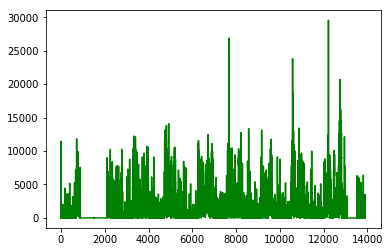

In [9]:
Datos=open("Antonio López Rivera (2016-09-02)60secDataTable.txt", "r") #se lee la serie de tiempo y se grafica
Kleur='green'

Serie=Datos.read().split('\n')
print('First 5 time series values:',Serie[0:5])
Datos1 = np.loadtxt(Serie)
#Serie=np.array(Serie).astype(np.float) # convert to numerical values
#SBP=Serie=np.array(Serie,dtype=float) # alternative command
print('First 5 time series values:',Datos1[0:5])

N=len(Datos1)
print('Average value of time series:',np.mean(Datos1))
print('Length of time series',N)

plt.clf()
plt.plot(Datos1,Kleur)
plt.show()

Time= 2019-05-12 20:20:59.841588
Time= 2019-05-12 20:21:19.750726


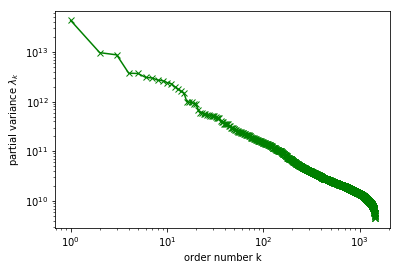

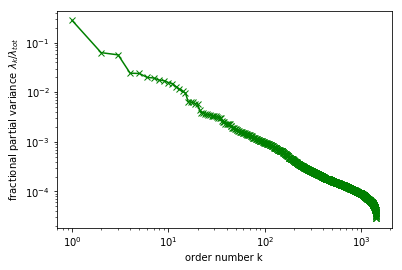

In [10]:
print('Time=',str(datetime.now())) #se pide la hora en la que se inició el código, debido a que es un código que es un poco lento
L=1440 #se define el valor L como 1440 que son el número de datos que se tienen en un día si se obtiene un dato cada minuto
l=ScreeSSA(Datos1,L) #se asigna a l el resultado de evaluar ScreeSSA con la serie de tiempo actual para L=1440
print('Time=',str(datetime.now())) 
k=np.arange(len(l)) 
k=k+1
plt.clf()
plt.plot(k,l,'-x',color=Kleur) #se grafica el resultado del ScreeSSA
plt.xscale('log')
plt.yscale('log')
plt.xlabel('order number k')
plt.ylabel(r'partial variance $\lambda_k$')
plt.show()
plt.clf()
plt.plot(k,l/sum(l),'-x',color=Kleur)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('order number k')
plt.ylabel(r'fractional partial variance $\lambda_k/\lambda_{tot}$')
plt.show()

Time= 2019-05-12 22:38:02.373341
Time= 2019-05-12 23:51:54.969443


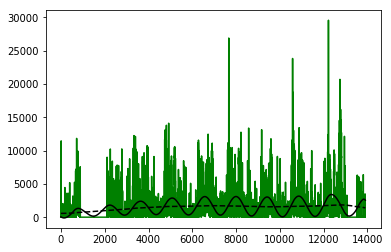

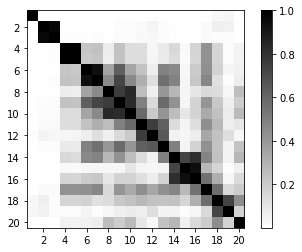

Acrofases (máximos locales); [  770  2224  3743  5179  6582  7960  9500 10876 12218 13897]  (como tiempo corrido)
Acrofases (máximos locales); [ 6.41666667 18.53333333  7.19166667 19.15833333  6.85       18.33333333
  7.16666667 18.63333333  5.81666667 19.80833333]  (como horas después de la medianoche)
Acrofases (máximos locales); [2310. 6672. 2589. 6897. 2466. 6600. 2580. 6708. 2094. 7131.]  (como grados después de la medianoche)


In [12]:
print('Time=',str(datetime.now()))
L=2880#se define L 
r, l, gkList, wMatriz = SSA(Datos1,L) #se asigna una letra al output de la función SSA 
print('Time=',str(datetime.now()))
Trend=gkList[0] #el primer elemento de la lista gK es la tendencia
Circ=gkList[1]+gkList[2] #el segundo y tercer elemento de a lista son los elementos circadianos, es decir el ritmo de 24 horas y el 12 horas
plt.plot(Datos1,color=Kleur)
plt.plot(Trend,'--',color='black')#se grafica la tendencia
plt.plot(Trend+Circ,color='black')#se grafica la tendencia más el ciclo circadiano
plt.show()
x=np.arange(1, 20, 2) #se hace un arange del 1 al veinte con saltos de dos 
y=x+1
plt.clf()
plt.imshow(wMatriz,cmap=plt.cm.binary); #se hace un mapeo de los valores de la matriz el cuál se graficará en escala de grises
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show() 

x= gkList[0]+gkList[1]+gkList[2] #se define x como la función que se ajustó a los datos de la serie de tiempo a través de SSA
indexes=find_peaks_cwt(x,np.arange(1, 550)) #indices(máximmos locales)
indices= [] #por medio de la función find_peaks se encuentran máximos locales para la función y se define una lista vacía donde se apendarán estos indices
#for i in indexes:
    #indices.append(i)
#print(indices)   
print("Acrofases (máximos locales);", indexes," (como tiempo corrido)")
print("Acrofases (máximos locales);", indexes%2880/120," (como horas después de la medianoche)")
print("Acrofases (máximos locales);", indexes%2880/120*360," (como grados después de la medianoche)")

In [13]:
indices= np.array(indexes).tolist() #se define indices como el array de indexes hecho un lista
indices.remove(indices[0]) #se quita el primer elemento y el último ya que la serie de tiempo no empieza a media noche y estos
#valores no corresponden con el valor real 
indices.remove(indices[-1]) 
print(indices) 

[2224, 3743, 5179, 6582, 7960, 9500, 10876, 12218]


In [14]:
valores= []
prom= []
def perprom(lista): #se define una función que calcula el promedio de los periodos, para esto resta los dos picos sucesivos de ahí
    #se obtiene la duración del periodo por día, y se calcula el promedio para tener el valor aproximado del periodo
    for i in range (0, len(lista)-1):
        a= lista[i+1]-lista[i]
        valores.append(a)
    for i in range (0, len(valores)):
        b= sum(valores)
        bp= b/len(valores)
    prom.append(bp)
    return prom #regresa el valor promedio del periodo
perprom(indices)

[1427.7142857142858]